<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
import torch

In [ ]:
x = torch.randn(3, requires_grad = True)

In [ ]:
print(x)

tensor([-1.2561, -3.5029, -1.4459], requires_grad=True)


In [ ]:
y = x + 2
y.retain_grad()

In [ ]:
z = y * y*2
z.retain_grad()
z = z.mean()
print(z)

tensor(2.0794, grad_fn=<MeanBackward0>)


In [ ]:
z.backward(retain_graph=True)

In [ ]:
x,y, z

(tensor([-1.2561, -3.5029, -1.4459], requires_grad=True),
 tensor([ 0.7439, -1.5029,  0.5541], grad_fn=<AddBackward0>),
 tensor(2.0794, grad_fn=<MeanBackward0>))

In [ ]:
x.grad, y.grad

(tensor([ 0.9919, -2.0039,  0.7388]), tensor([ 0.9919, -2.0039,  0.7388]))

## For multiple z values

In [ ]:
import torch

In [ ]:
x = torch.randn(3, requires_grad = True)

In [ ]:
print(x)

tensor([-1.3521, -0.5026, -0.7557], requires_grad=True)


In [ ]:
y = x + 2
y.retain_grad()

In [ ]:
z = y * y*2
z.retain_grad()
#z = z.mean()
print(z)

tensor([0.8396, 4.4845, 3.0964], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v, retain_graph=True)

In [ ]:
x, y, z

(tensor([-1.3521, -0.5026, -0.7557], requires_grad=True),
 tensor([0.6479, 1.4974, 1.2443], grad_fn=<AddBackward0>),
 tensor([0.8396, 4.4845, 3.0964], grad_fn=<MulBackward0>))

In [ ]:
x.grad, y.grad

(tensor([2.5917e-01, 5.9897e+00, 4.9771e-03]),
 tensor([2.5917e-01, 5.9897e+00, 4.9771e-03]))

## Stopping gradient descent

In [ ]:
x.requires_grad_(False)
print(x)

tensor([-1.3521, -0.5026, -0.7557])


In [ ]:
y = x.detach()
print(y)

tensor([-1.3521, -0.5026, -0.7557])


In [ ]:
with torch.no_grad():
    print(x)

tensor([-1.3521, -0.5026, -0.7557])


## Zeroing Gradients

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(5):
    model_output = (weights * 3).sum()

    model_output.backward()

    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])
tensor([15., 15., 15., 15.])


In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(5):
    model_output = (weights * 3).sum()

    model_output.backward()

    print(weights.grad)

    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Backpropagation

In [ ]:
weights = torch.ones(4, requires_grad=True)

In [ ]:
pip list| grep nbdevAuto

nbdevAuto                 0.0.130        /home/ben/BENEDICT_Only/Benedict_Projects/Benedict_ML/nbdevAuto
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from graphviz import Digraph
from nbdevAuto import functions

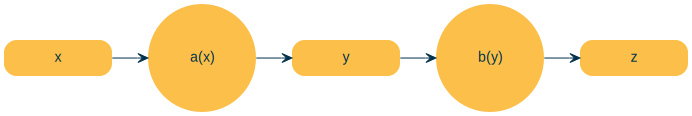

In [ ]:
dot = functions.graph()
# Add nodes with different shapes and formatting
dot.node('x', 'x')
dot.node('a', 'a(x)', shape='circle')
dot.node('y', 'y')
dot.node('b', 'b(y)', shape='circle')
dot.node('z', 'z')

# Add edges with custom labels and formatting
dot.edge('x', 'a')
dot.edge('a', 'y')
dot.edge('y', 'b')
dot.edge('b', 'z')

# Render the graph
dot

**Chain rule**

$\dfrac{\delta z}{\delta x} =  \dfrac{\delta z}{\delta y} \cdot \dfrac{\delta y}{\delta x}$

## Computational Graph

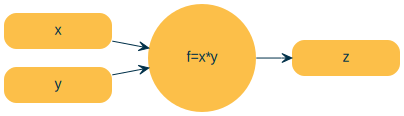

In [ ]:
dot = functions.graph()
# Add nodes with different shapes and formatting
dot.node('x', 'x')
dot.node('*', 'f=x*y', shape='circle')
dot.node('y', 'y')
dot.node('z', 'z')

# Add edges with custom labels and formatting
dot.edge('x', '*')
dot.edge('y', '*')
dot.edge('*', 'z')

# Render the graph
dot

$\dfrac{\delta z}{\delta x}  = \dfrac{\delta xy}{\delta x} = y$ 

$\dfrac{\delta z}{\delta y}  = \dfrac{\delta xy}{\delta y} = y$ 


$\dfrac{\delta  \ \text{loss}}{\delta x}  = \dfrac{\delta  \ \text{loss}}{\delta z}  \cdot \dfrac{\delta  z}{\delta x}  $ 

1. Forward pass: Computer loss
2. Compute local gradients
3. Backward pass: Compute dLoss/dWeights using the Chain Rule

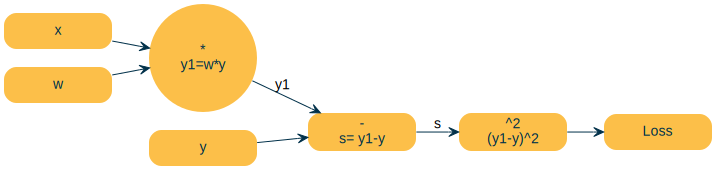

In [ ]:
dot = functions.graph()
# Add nodes with different shapes and formatting
dot.node('x', 'x')
dot.node('w', 'w')
dot.node('*', '*\ny1=w*y', shape='circle')

dot.node('y', 'y')
dot.node('-', '-\ns= y1-y')

dot.node('^2', '^2\n(y1-y)^2')
dot.node('Loss', 'Loss')
# Add edges with custom labels and formatting
dot.edge('x', '*')
dot.edge('w', '*')

dot.edge('*', '-', label='y1')
dot.edge('y', '-')

dot.edge('-', '^2', label='s')

dot.edge('^2', 'Loss')
# Render the graph
dot

$Loss = (\hat{y} - y)^2$ 

$\dfrac{\delta loss}{\delta s} = \dfrac{s^2}{s} = 2s$

$\dfrac{\delta s}{\delta \hat{y}} = \dfrac{\delta\hat{y} - y}{\delta \hat{y}} = 1$

$\dfrac{\delta \hat{y}}{\delta w} = \dfrac{\delta wx}{\delta w} = x$

$\therefore \dfrac{\delta loss}{\delta w} = \dfrac{\delta loss}{\delta s} \cdot \dfrac{\delta s}{\delta y} \cdot  \dfrac{\delta \hat{y}}{\delta w} = 2 \cdot s \cdot x = 2 \cdot (-1) \cdot (1) = -2$

In [ ]:
x = 1
y = 2
w = 1

y1 = x * w 
s = y1-y
loss = s**2

In [ ]:
print(f'x:{x} w:{w} y1:{y1} y:{y} s:{s} loss:{loss}')

x:1 w:1 y1:1 y:2 s:-1 loss:1


In [ ]:
import torch
x = torch.tensor(1.0)
y = torch.tensor(2.0)

In [ ]:
w = torch.tensor(1.0, requires_grad = True)

lr = 0.005

In [ ]:
#forward pass and compute the loss
y1 = w * x
loss = (y1-y)**2

print(y1)
print(loss)

tensor(1., grad_fn=<MulBackward0>)
tensor(1., grad_fn=<PowBackward0>)


In [ ]:
# backward pass

loss.backward()
print(w.grad)

w.grad.zero_()

tensor(-2.)


tensor(0.)

## Gradient Descent

### Numpy


> Prediction: Manually

> Gradients Computation: Manually

> Loss Computation: Manually

> Parameter updates: Manually

In [ ]:
import numpy as np

In [ ]:
x = np.array([1,2,3,4], dtype=np.float32)
y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

In [ ]:
# model
def forward(x):
    return w * x


def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

In [ ]:
# gradient

# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)

def gradient (x, y, y_predicted):
    return np.dot(2 * x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [ ]:
learning_rate = 0.01
n_iters = 15

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    dw = gradient(x, y, y_pred)

    # update weights
    w -= learning_rate * dw

    if epoch % 1 == 0:
        print(f'epoc:{epoch}  w = {w:.3f} , y_pred={forward(5)}, y = {10}, loss = {l:.8f}, dw = {dw}')

print(f'Prediction after training: {forward(5):.3f}, y = {10}')

epoc:0  w = 1.200 , y_pred=6.0, y = 10, loss = 30.00000000, dw = -120.0
epoc:1  w = 1.680 , y_pred=8.399999809265136, y = 10, loss = 4.79999924, dw = -47.999996185302734
epoc:2  w = 1.872 , y_pred=9.35999994277954, y = 10, loss = 0.76800019, dw = -19.200002670288086
epoc:3  w = 1.949 , y_pred=9.743999934196472, y = 10, loss = 0.12288000, dw = -7.679999828338623
epoc:4  w = 1.980 , y_pred=9.897600066661834, y = 10, loss = 0.01966083, dw = -3.072002649307251
epoc:5  w = 1.992 , y_pred=9.95904014110565, y = 10, loss = 0.00314574, dw = -1.2288014888763428
epoc:6  w = 1.997 , y_pred=9.983615934848784, y = 10, loss = 0.00050331, dw = -0.4915158748626709
epoc:7  w = 1.999 , y_pred=9.993446409702301, y = 10, loss = 0.00008053, dw = -0.1966094970703125
epoc:8  w = 1.999 , y_pred=9.997378492355345, y = 10, loss = 0.00001288, dw = -0.07864165306091309
epoc:9  w = 2.000 , y_pred=9.998951268196105, y = 10, loss = 0.00000206, dw = -0.03145551681518555
epoc:10  w = 2.000 , y_pred=9.999580299854276, y

### Torch


> Prediction: Manually

> Gradients Computation: Autograd

> Loss Computation: Manually

> Parameter updates: Manually

In [ ]:
x = torch.tensor([1,2,3,4], dtype=torch.float32)
y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)

In [ ]:
# model
def forward(x):
    return w * x


def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

In [ ]:
# gradient

# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)

print(f'Prediction before training: f(5) = {forward(5)}')

Prediction before training: f(5) = tensor([0.], grad_fn=<MulBackward0>)


In [ ]:
learning_rate = 0.01
n_iters = 50

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    l.backward()

    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad

    if epoch % 2 == 0:
        print(f'epoc:{epoch}  w = {w.item():.3f}, y_pred={forward(5).item():.3f}, y = {10}, loss = {l.item():.7f}, dw = {w.grad.item():.7f}')

    w.grad.zero_()

print(f'Prediction after training: {forward(5)}, y = {10}')

epoc:0  w = 0.300, y_pred=1.500, y = 10, loss = 30.0000000, dw = -30.0000000
epoc:2  w = 0.772, y_pred=3.859, y = 10, loss = 15.6601877, dw = -21.6749992
epoc:4  w = 1.113, y_pred=5.563, y = 10, loss = 8.1747169, dw = -15.6601877
epoc:6  w = 1.359, y_pred=6.794, y = 10, loss = 4.2672529, dw = -11.3144855
epoc:8  w = 1.537, y_pred=7.684, y = 10, loss = 2.2275321, dw = -8.1747150
epoc:10  w = 1.665, y_pred=8.327, y = 10, loss = 1.1627856, dw = -5.9062314
epoc:12  w = 1.758, y_pred=8.791, y = 10, loss = 0.6069812, dw = -4.2672515
epoc:14  w = 1.825, y_pred=9.126, y = 10, loss = 0.3168478, dw = -3.0830884
epoc:16  w = 1.874, y_pred=9.369, y = 10, loss = 0.1653965, dw = -2.2275314
epoc:18  w = 1.909, y_pred=9.544, y = 10, loss = 0.0863381, dw = -1.6093917
epoc:20  w = 1.934, y_pred=9.671, y = 10, loss = 0.0450689, dw = -1.1627841
epoc:22  w = 1.952, y_pred=9.762, y = 10, loss = 0.0235263, dw = -0.8401127
epoc:24  w = 1.966, y_pred=9.828, y = 10, loss = 0.0122808, dw = -0.6069803
epoc:26  w 

### Pytorch Loss and Pytorch Optimizer


> Prediction: Manually

> Gradients Computation: Autograd

> Loss Computation: Pytorch Loss

> Parameter updates: Pytorch Optimizer

1. Design Model = (input, output, size, forward pass)
2. Construct loss and optimizer
3. Training loop
   - forward pass: compute prediction
   - backward pass: gradients
   - update weights

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([1,2,3,4], dtype=torch.float32)
y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)

In [ ]:
# model
def forward(x):
    return w * x

In [ ]:
print(f'Prediction before training: f(5) = {forward(5)}')

Prediction before training: f(5) = tensor([0.], grad_fn=<MulBackward0>)


In [ ]:
learning_rate = 0.01
n_iters = 50

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr= learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    l.backward()

    optimizer.step()


    if epoch % 2 == 0:
        print(f'epoc:{epoch}  w = {w.item():.3f}, y_pred={forward(5).item():.3f}, y = {10}, loss = {l.item():.7f}, dw = {w.grad.item():.7f}')

    optimizer.zero_grad()

print(f'Prediction after training: {forward(5)}, y = {10}')

epoc:0  w = 0.300, y_pred=1.500, y = 10, loss = 30.0000000, dw = -30.0000000
epoc:2  w = 0.772, y_pred=3.859, y = 10, loss = 15.6601877, dw = -21.6749992
epoc:4  w = 1.113, y_pred=5.563, y = 10, loss = 8.1747169, dw = -15.6601877
epoc:6  w = 1.359, y_pred=6.794, y = 10, loss = 4.2672529, dw = -11.3144855
epoc:8  w = 1.537, y_pred=7.684, y = 10, loss = 2.2275321, dw = -8.1747150
epoc:10  w = 1.665, y_pred=8.327, y = 10, loss = 1.1627856, dw = -5.9062314
epoc:12  w = 1.758, y_pred=8.791, y = 10, loss = 0.6069812, dw = -4.2672515
epoc:14  w = 1.825, y_pred=9.126, y = 10, loss = 0.3168478, dw = -3.0830884
epoc:16  w = 1.874, y_pred=9.369, y = 10, loss = 0.1653965, dw = -2.2275314
epoc:18  w = 1.909, y_pred=9.544, y = 10, loss = 0.0863381, dw = -1.6093917
epoc:20  w = 1.934, y_pred=9.671, y = 10, loss = 0.0450689, dw = -1.1627841
epoc:22  w = 1.952, y_pred=9.762, y = 10, loss = 0.0235263, dw = -0.8401127
epoc:24  w = 1.966, y_pred=9.828, y = 10, loss = 0.0122808, dw = -0.6069803
epoc:26  w 

### Pytorch Automate


> Prediction: Manually

> Gradients Computation: Autograd

> Loss Computation: Pytorch Loss

> Parameter updates: Pytorch Optimizer

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype = torch.float32)
n_samples, n_features = x.shape
n_samples, n_features

(4, 1)

In [ ]:
model = nn.Linear(in_features = n_features, out_features = 1)
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
[w,b] = model.parameters()
w[0].item()

-0.8376840353012085

In [ ]:
model.state_dict()['weight']

tensor([[-0.8377]])

In [ ]:
print(f'Prediction before training: f(5) = {model(x_test)}')

Prediction before training: f(5) = tensor([-3.8722], grad_fn=<ViewBackward0>)


In [ ]:
learning_rate = 0.1
n_iters = 500

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    l.backward()

    optimizer.step()


    if epoch % 20 == 0:
        [w,b] = model.parameters()
        print(f'epoc:{epoch}  w = {w[0].item():.3f} {b[0].item():.3f}, y_pred={model(x_test).item():.3f}, y = {10}, loss = {l.item():.7f}, dw = {w.grad.item():.7f}')

    optimizer.zero_grad()

print(f'Prediction after training: {model(x_test)}, y = {10}')

epoc:0  w = 3.261 1.672, y_pred=17.975, y = 10, loss = 56.0067291, dw = -40.9841690
epoc:20  w = 1.794 0.607, y_pred=9.578, y = 10, loss = 0.0653165, dw = -0.0772833
epoc:40  w = 1.888 0.330, y_pred=9.769, y = 10, loss = 0.0193617, dw = -0.0346756
epoc:60  w = 1.939 0.180, y_pred=9.874, y = 10, loss = 0.0057399, dw = -0.0188781
epoc:80  w = 1.967 0.098, y_pred=9.931, y = 10, loss = 0.0017016, dw = -0.0102807
epoc:100  w = 1.982 0.053, y_pred=9.963, y = 10, loss = 0.0005045, dw = -0.0055964
epoc:120  w = 1.990 0.029, y_pred=9.980, y = 10, loss = 0.0001496, dw = -0.0030484
epoc:140  w = 1.995 0.016, y_pred=9.989, y = 10, loss = 0.0000443, dw = -0.0016569
epoc:160  w = 1.997 0.009, y_pred=9.994, y = 10, loss = 0.0000131, dw = -0.0009021
epoc:180  w = 1.998 0.005, y_pred=9.997, y = 10, loss = 0.0000039, dw = -0.0004910
epoc:200  w = 1.999 0.003, y_pred=9.998, y = 10, loss = 0.0000012, dw = -0.0002694
epoc:220  w = 2.000 0.001, y_pred=9.999, y = 10, loss = 0.0000003, dw = -0.0001463
epoc:24

### Pytorch Model


> Prediction: Manually

> Gradients Computation: Autograd

> Loss Computation: Pytorch Loss

> Parameter updates: Pytorch Optimizer

1. Design Model = (input, output, size, forward pass)
2. Construct loss and optimizer
3. Training loop
   - forward pass: compute prediction
   - backward pass: gradients
   - update weights

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype = torch.float32)
n_samples, n_features = x.shape
n_samples, n_features

(4, 1)

In [ ]:
model = nn.Linear(in_features = n_features, out_features = 1)
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearRegression, self).__init__()

        self.lin = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(in_features = n_features, out_features = 1)
model

LinearRegression(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
[w,b] = model.parameters()
w[0].item()

-0.08443880081176758

In [ ]:
model.state_dict()['lin.weight']

tensor([[-0.0844]])

In [ ]:
print(f'Prediction before training: f(5) = {model(x_test)}')

Prediction before training: f(5) = tensor([-0.1386], grad_fn=<ViewBackward0>)


In [ ]:
learning_rate = 0.1
n_iters = 500

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    l.backward()

    optimizer.step()


    if epoch % 20 == 0:
        [w,b] = model.parameters()
        print(f'epoc:{epoch}  w = {w[0].item():.3f} {b[0].item():.3f}, y_pred={model(x_test).item():.3f}, y = {10}, loss = {l.item():.7f}, dw = {w.grad.item():.7f}')

    optimizer.zero_grad()

print(f'Prediction after training: {model(x_test)}, y = {10}')

epoc:0  w = 2.900 1.269, y_pred=15.771, y = 10, loss = 29.7110996, dw = -29.8484650
epoc:20  w = 1.841 0.470, y_pred=9.673, y = 10, loss = 0.0391924, dw = -0.0592351
epoc:40  w = 1.913 0.256, y_pred=9.821, y = 10, loss = 0.0116179, dw = -0.0268617
epoc:60  w = 1.953 0.139, y_pred=9.902, y = 10, loss = 0.0034442, dw = -0.0146208
epoc:80  w = 1.974 0.076, y_pred=9.947, y = 10, loss = 0.0010210, dw = -0.0079615
epoc:100  w = 1.986 0.041, y_pred=9.971, y = 10, loss = 0.0003027, dw = -0.0043370
epoc:120  w = 1.992 0.022, y_pred=9.984, y = 10, loss = 0.0000897, dw = -0.0023587
epoc:140  w = 1.996 0.012, y_pred=9.991, y = 10, loss = 0.0000266, dw = -0.0012866
epoc:160  w = 1.998 0.007, y_pred=9.995, y = 10, loss = 0.0000079, dw = -0.0007011
epoc:180  w = 1.999 0.004, y_pred=9.997, y = 10, loss = 0.0000023, dw = -0.0003816
epoc:200  w = 1.999 0.002, y_pred=9.999, y = 10, loss = 0.0000007, dw = -0.0002074
epoc:220  w = 2.000 0.001, y_pred=9.999, y = 10, loss = 0.0000002, dw = -0.0001137
epoc:24

## Linear Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

1. Prepare data
2. model
3. loss and optimizer
4. training loop

In [ ]:
x_numpy, y_numpy = datasets.make_regression(n_samples= 100, n_features=1, noise = 20, random_state = 1)

In [ ]:
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
x[:5], y[:5]

(tensor([[-0.6118],
         [-0.2494],
         [ 0.4885],
         [ 0.7620],
         [ 1.5198]]),
 tensor([-55.5386, -10.6620,  22.7574, 101.0961, 144.3376]))

In [ ]:
x_test = x[4]
y_test = y[4]
x_test, y_test

(tensor([1.5198]), tensor(144.3376))

In [ ]:
y =y.view(y.shape[0], 1)
x[:5], y[:5]

(tensor([[-0.6118],
         [-0.2494],
         [ 0.4885],
         [ 0.7620],
         [ 1.5198]]),
 tensor([[-55.5386],
         [-10.6620],
         [ 22.7574],
         [101.0961],
         [144.3376]]))

In [ ]:
n_samples, n_features = x.shape
n_samples, n_features

(100, 1)

In [ ]:
#1.model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
[a,b] = model.parameters()
a,b

(Parameter containing:
 tensor([[-0.3357]], requires_grad=True),
 Parameter containing:
 tensor([0.3514], requires_grad=True))

In [ ]:
#2. loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
#3. training loop
num_epochs = 1000

for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(x)
    loss=criterion(y_predicted, y)

    # backward pass
    loss.backward()

    #update
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        [w,b] = model.parameters()
        print(f'[epoc:{epoch}] (y = {w[0].item():.3f}x + {b[0].item():.3f}) y_pred:{model(x_test).item():.3f}, y:{y_test}, loss :{loss.item():.7f}, dw:{w.grad.item():.7f} db:{b.grad.item():.7f}')

    optimizer.zero_grad()

[epoc:49] (y = 45.054x + 4.782) y_pred:73.255, y:144.33755493164062, loss :1468.2329102, dw:-59.7857857 db:-3.2169607
[epoc:99] (y = 65.507x + 5.259) y_pred:104.818, y:144.33755493164062, loss :565.6588745, dw:-27.0066071 db:0.3266662
[epoc:149] (y = 74.762x + 4.920) y_pred:118.545, y:144.33755493164062, loss :380.9410095, dw:-12.2441845 db:0.7970295
[epoc:199] (y = 78.964x + 4.564) y_pred:124.575, y:144.33755493164062, loss :342.6767883, dw:-5.5675182 db:0.5981486
[epoc:249] (y = 80.877x + 4.328) y_pred:127.246, y:144.33755493164062, loss :334.6894531, dw:-2.5375218 db:0.3580039
[epoc:299] (y = 81.749x + 4.195) y_pred:128.438, y:144.33755493164062, loss :333.0141296, dw:-1.1586771 db:0.1943260
[epoc:349] (y = 82.148x + 4.124) y_pred:128.973, y:144.33755493164062, loss :332.6617126, dw:-0.5298302 db:0.0999891
[epoc:399] (y = 82.330x + 4.088) y_pred:129.215, y:144.33755493164062, loss :332.5874329, dw:-0.2425606 db:0.0497854
[epoc:449] (y = 82.414x + 4.070) y_pred:129.324, y:144.3375549

In [ ]:
predicted = model(x).detach().numpy()

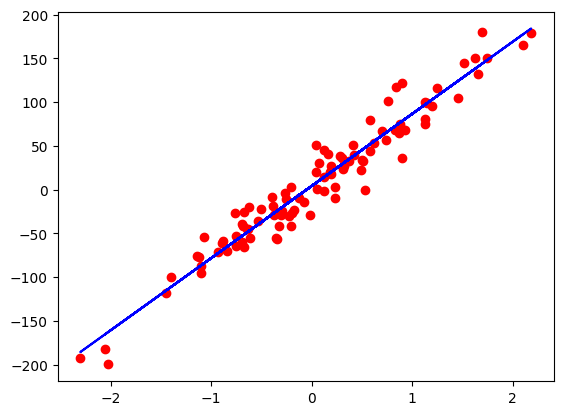

In [ ]:
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

In [ ]:
from bokeh.io import output_notebook

In [ ]:
output_notebook()

Loading BokehJS ...

In [ ]:
from bokeh.plotting import figure, show

from bokeh.io import curdoc
# apply theme to current document
curdoc().theme = "dark_minimal"


# create a new plot with a title and axis labels
p = figure(title="Real data vs Model",
           x_axis_label='x',
           y_axis_label='y',
           sizing_mode="stretch_width",
           max_width=1000,
           height=500,)


# add a line renderer with legend and line thickness to the plot
p.circle(x_numpy.flatten(), y_numpy.flatten(), legend_label="Original", line_width=2, color="red", radius=0.02)
p.line(x_numpy.flatten(), predicted.flatten(), legend_label="Predicted", line_width=2)

p.legend.location = "top_left"
p.legend.click_policy="mute"

# show the results
show(p)

## Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
bc = datasets.load_breast_cancer()
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
x, y = bc.data, bc.target
n_samples, n_features = x.shape
n_samples, n_features

(569, 30)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
y_train = y_train.view(y_train.shape[0], 1)

In [ ]:
#1. model

class LogisticRegression(nn.Module):
    def __init__(self, n_input):
        super(LogisticRegression, self).__init__()

        self.linear = nn.Linear(n_input, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))

        return y_pred

model = LogisticRegression(n_features)

In [ ]:
#2. loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
#3. train loop
num_epochs = 1000
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(x_train)
    loss=criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    #update
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        with torch.no_grad():
            [w,b] = model.parameters()
            y_predicted = model(x_test)
            y_predicted_cls = y_predicted.round().flatten()
            acc = (y_predicted_cls == y_test).float().mean() * 100
            error = (100 - acc)
            print(f'[epoc:{epoch + 1}] (y = {w.mean().item():.3f}x + {b.mean().item():.3f}) \
            loss:{loss.item():.5f}, accuracy: {acc:.2f}%, error: {error:.2f}%, \
            dw:{w.grad.mean().item():.5f} db:{b.grad.mean().item():.5f}')

    optimizer.zero_grad()

[epoc:50] (y = -0.171x + 0.301)             loss:0.11539, accuracy: 93.86%, error: 6.14%,             dw:0.01317 db:-0.03279
[epoc:100] (y = -0.222x + 0.488)             loss:0.07955, accuracy: 94.74%, error: 5.26%,             dw:0.00604 db:-0.01464
[epoc:150] (y = -0.257x + 0.602)             loss:0.06487, accuracy: 95.61%, error: 4.39%,             dw:0.00404 db:-0.00820
[epoc:200] (y = -0.286x + 0.681)             loss:0.05622, accuracy: 96.49%, error: 3.51%,             dw:0.00301 db:-0.00513
[epoc:250] (y = -0.311x + 0.739)             loss:0.05038, accuracy: 95.61%, error: 4.39%,             dw:0.00238 db:-0.00343
[epoc:300] (y = -0.334x + 0.783)             loss:0.04613, accuracy: 95.61%, error: 4.39%,             dw:0.00197 db:-0.00240
[epoc:350] (y = -0.355x + 0.817)             loss:0.04288, accuracy: 95.61%, error: 4.39%,             dw:0.00167 db:-0.00173
[epoc:400] (y = -0.375x + 0.844)             loss:0.04031, accuracy: 95.61%, error: 4.39%,             dw:0.00144 db:-0

In [ ]:
with torch.no_grad():
    [w,b] = model.parameters()
    y_predicted = model(x_test)
    y_predicted_cls = y_predicted.round().flatten()
    acc = (y_predicted_cls == y_test).float().mean() * 100
    error = (100 - acc)
    print(f'[epoc:{epoch + 1}] (y = {w.mean().item():.3f}x + {b.mean().item():.3f}) \
    loss:{loss.item():.5f}, accuracy: {acc:.2f}%, error: {error:.2f}%')

[epoc:1000] (y = -0.554x + 0.942)     loss:0.02754, accuracy: 95.61%, error: 4.39%


## Softmax and Cross-Entropy

### Softmax
> $S(y_i) = \frac{e^{y_i}}{\sum e^{y_i}}$

$Linear = [2.0, 1.0, 0.1]$

$Softmax = [0.7, 0.2, 0.1]$


**Adds to 1**

In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
outputs

array([0.65900114, 0.24243297, 0.09856589])

In [ ]:
x = torch.from_numpy(x)
x

tensor([2.0000, 1.0000, 0.1000], dtype=torch.float64)

In [ ]:
outputs = torch.softmax(x, dim = 0)
outputs

tensor([0.6590, 0.2424, 0.0986], dtype=torch.float64)

## Cross Entropy

> $D(\hat{Y}, Y) = \dfrac{1}{N} \cdot \displaystyle\sum_{i=1}^{N} Y_i \cdot \log{\hat{Y_i}}$

$Y = [1, 0, 0]$

$\hat{Y} = [0.7, 0.2, 0.1]  --> D(\hat{Y}, Y) = 0.35$

$Y = [1, 0, 0]$

$\hat{Y} = [0.7, 0.2, 0.1]  --> D(\hat{Y}, Y) = 2.30$

In [ ]:
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss

In [ ]:
Y_actual = np.array([1,0,0])

Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(Y_actual, Y_pred_good)
l2 = cross_entropy(Y_actual, Y_pred_bad)

In [ ]:
print(f'good pred:{l1:4f}, bad pred:{l2:.4f}')

good pred:0.356675, bad pred:2.3026


### nn.CrossEntropyLoss()

> applies nn.LogSoftmax + nn.NLLLoss(negative log likelihood loss)

> y has class labels, not One-Hot!

> Y_pred has raw scores(logits), no softmax

In [ ]:
loss = nn.CrossEntropyLoss()

In [ ]:
Y = torch.tensor([0])

Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'good pred:{l1:4f}, bad pred:{l2:.4f}')

good pred:0.417030, bad pred:1.8406


In [ ]:
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(f'good pred:{predictions1}, bad pred:{predictions2}')

good pred:tensor([0]), bad pred:tensor([1])


In [ ]:
#Multiclass Problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.rely = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)

        return out

In [ ]:
model = NeuralNet2(input_size = 28 * 28, hidden_size = 5, num_classes = 3)
crioterion = nn.CrossEntropyLoss()

## Activation Functions

> Without activation functions, our network is basically just a stacked linear regression model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Option 1 (create nn modules)
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        self.sigmoid = nn.Sigmoid()
        

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)

        return out

In [ ]:
#Option 2 (use activation functions directly in forward pass)
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))

        return out

## MLP on MNIST

- MNIST
- DataLoader, Transformation
- Multilayer Neural Net, activation function
- Loss and Optimizer
- Training Loop (batch training)
- Model evaluation
- GPU Support

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms 
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
input_size = 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100

In [ ]:
train_dataset = torchvision.datasets.MNIST(root="./data",
                                           download=True,
                                           train=True,
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root="./data",
                                          download=True,
                                          train=False,
                                          transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

In [ ]:
len(train_dataset), len(test_dataset)

(60000, 10000)

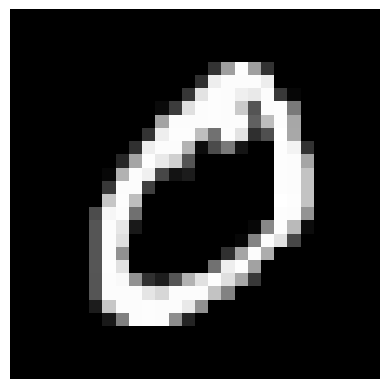

In [ ]:
image, label = train_dataset[1]
plt.imshow(transforms.ToPILImage()(image), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
examples = iter(train_loader)
images, labels = next(examples)

In [ ]:
images.shape, labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

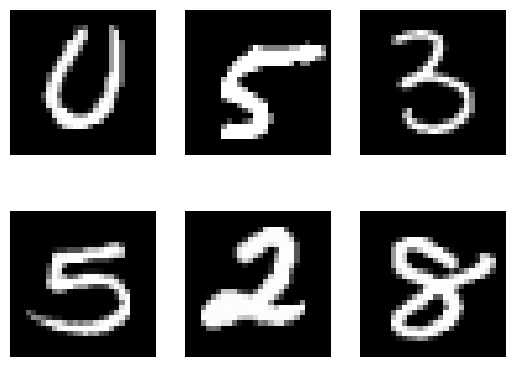

In [ ]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i][0], cmap = 'gray')
    plt.axis('off')

plt.show()

In [ ]:
# model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
# loss and optimizer
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
# Train loop
n_total_steps = len(train_loader)
running_loss = 0.0
print_stat = 100

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28 --> 100 , 28 * 28
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % print_stat == 0:
            with torch.no_grad():
                n_correct = 0
                n_samples = 0
                for images, labels in test_loader:
                    images = images.reshape(-1, 28 * 28).to(device)
                    labels = labels.to(device)
                    outputs = model(images)

                    _, predictions = torch.max(outputs, 1)
                    n_samples += labels.shape[0]
                    n_correct += (predictions == labels).sum().item()
            
                acc = 100.0 * n_correct / n_samples
            
            print(f'[epoch:{epoch+1}/{num_epochs}, [step:{i+1}/{n_total_steps}] loss:{(running_loss/print_stat):.4f} accuracy:{acc}')
            running_loss = 0.0

[epoch:1/2, [step:100/600] loss:0.9543 accuracy:88.51333333333334
[epoch:1/2, [step:200/600] loss:0.3956 accuracy:90.49166666666666
[epoch:1/2, [step:300/600] loss:0.3070 accuracy:91.86666666666666
[epoch:1/2, [step:400/600] loss:0.2970 accuracy:92.62
[epoch:1/2, [step:500/600] loss:0.2614 accuracy:93.28833333333333
[epoch:1/2, [step:600/600] loss:0.2401 accuracy:93.665
[epoch:2/2, [step:100/600] loss:0.2229 accuracy:94.08166666666666
[epoch:2/2, [step:200/600] loss:0.2201 accuracy:94.43333333333334
[epoch:2/2, [step:300/600] loss:0.1986 accuracy:94.75833333333334
[epoch:2/2, [step:400/600] loss:0.1918 accuracy:94.61666666666666
[epoch:2/2, [step:500/600] loss:0.1879 accuracy:95.115
[epoch:2/2, [step:600/600] loss:0.1609 accuracy:95.52166666666666


In [ ]:
# Test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        #value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 95.52166666666666


## CNN on Cifar-10

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms 
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
num_epochs = 4
batch_size = 100

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root="./data", 
                                             download=True,
                                             train=True,
                                             transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root="./data",
                                            download=True,
                                            train=False,
                                            transform=transform)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(train_dataset), len(test_dataset)

(50000, 10000)

In [ ]:
classes = train_dataset.class_to_idx

In [ ]:
classes = list(train_dataset.class_to_idx)

In [ ]:
list(classes)

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
examples = iter(train_loader)
images, labels = next(examples)

In [ ]:
images.shape, labels.shape

(torch.Size([100, 3, 32, 32]), torch.Size([100]))

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # input size: 3 colour channels
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 40)
        self.fc3 = nn.Linear(40, 10)
        

    def forward(self, x):
        out = self.pool(F.relu(self.conv1(x)))
        out = self.pool(F.relu(self.conv2(out)))
        out = out.view(-1, 16*5*5)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)

        return out
        

model = ConvNet().to(device)

In [ ]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
# Image Classifier Neural Network
class ImageClassifier(nn.Module): 
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)), 
            nn.ReLU(),
            nn.Flatten(), 
            nn.Linear(64*(28-2)*(28-2), 10)  
        )

    def forward(self, x): 
        return self.model(x)

model = ImageClassifier().to(device)

In [ ]:
# Train loop
n_total_steps = len(train_loader)
running_loss = 0.0
print_stat = 100

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28 --> 100 , 28 * 28
        images = images.to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % print_stat == 0:
            with torch.no_grad():
                n_correct = 0
                n_samples = 0
                for images, labels in test_loader:
                    images = images.to(device)
                    labels = labels.to(device)
                    outputs = model(images)

                    _, predictions = torch.max(outputs, 1)
                    n_samples += labels.shape[0]
                    n_correct += (predictions == labels).sum().item()

                acc = 100.0 * n_correct / n_samples
            
            print(f'[epoch:{epoch+1}/{num_epochs}, [step:{i+1}/{n_total_steps}] loss:{(running_loss/print_stat):.4f} accuracy:{acc}')
            running_loss = 0.0

[epoch:1/4, [step:100/500] loss:2.3045 accuracy:6.866
[epoch:1/4, [step:200/500] loss:2.3044 accuracy:6.866
[epoch:1/4, [step:300/500] loss:2.3047 accuracy:6.866
[epoch:1/4, [step:400/500] loss:2.3047 accuracy:6.866
[epoch:1/4, [step:500/500] loss:2.3048 accuracy:6.866
[epoch:2/4, [step:100/500] loss:2.3046 accuracy:6.866
[epoch:2/4, [step:200/500] loss:2.3045 accuracy:6.866
[epoch:2/4, [step:300/500] loss:2.3046 accuracy:6.866
[epoch:2/4, [step:400/500] loss:2.3046 accuracy:6.866
[epoch:2/4, [step:500/500] loss:2.3048 accuracy:6.866
[epoch:3/4, [step:100/500] loss:2.3044 accuracy:6.866
[epoch:3/4, [step:200/500] loss:2.3045 accuracy:6.866
[epoch:3/4, [step:300/500] loss:2.3047 accuracy:6.866
[epoch:3/4, [step:400/500] loss:2.3051 accuracy:6.866
[epoch:3/4, [step:500/500] loss:2.3044 accuracy:6.866
[epoch:4/4, [step:100/500] loss:2.3046 accuracy:6.866
[epoch:4/4, [step:200/500] loss:2.3046 accuracy:6.866
[epoch:4/4, [step:300/500] loss:2.3048 accuracy:6.866
[epoch:4/4, [step:400/500] l